# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_8189/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

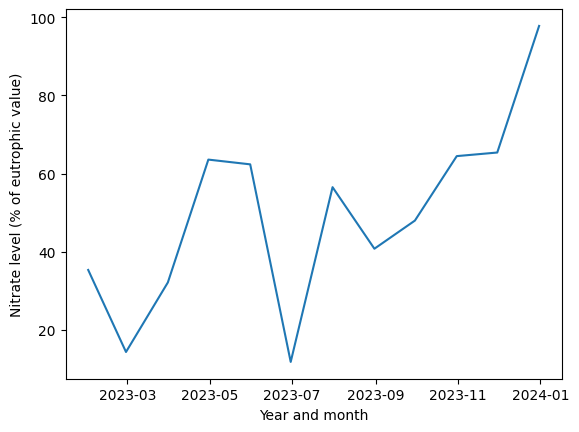

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_8189/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

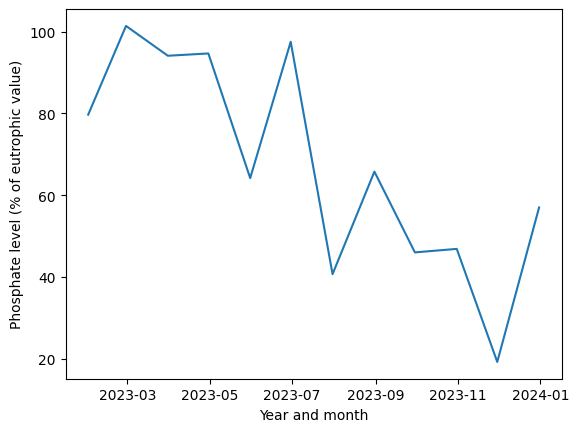

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

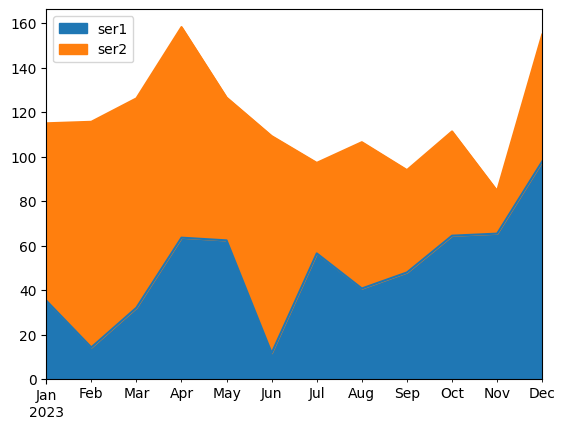

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

Area plots can be visually impactful because they emphasize the cumulative value of multiple variables over time. In the context of showing nitrate and phosphate levels, it helps with showing overall trends and nutrient load totals. It can also obscure individual trends when the two variables overlap, which make it harder to differentiate which variable is rising or falling. The lack of clarity hinders interpretation, like when values are close together or one variable dominates the display. A solution for this could be separate line graphs because they offer more clear comparisons of each variable's behavior over time. They also make it easier to find changes, spot peaks and dips, and interpret trends independently. Having said all that, I would recommend things like using consistent y-axis scaling, adding labeled lines directly on the plot, and combining the two variables into one graph using distinct colors.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

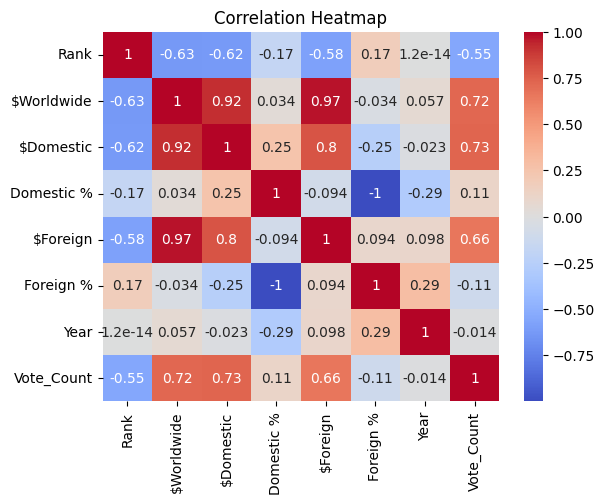

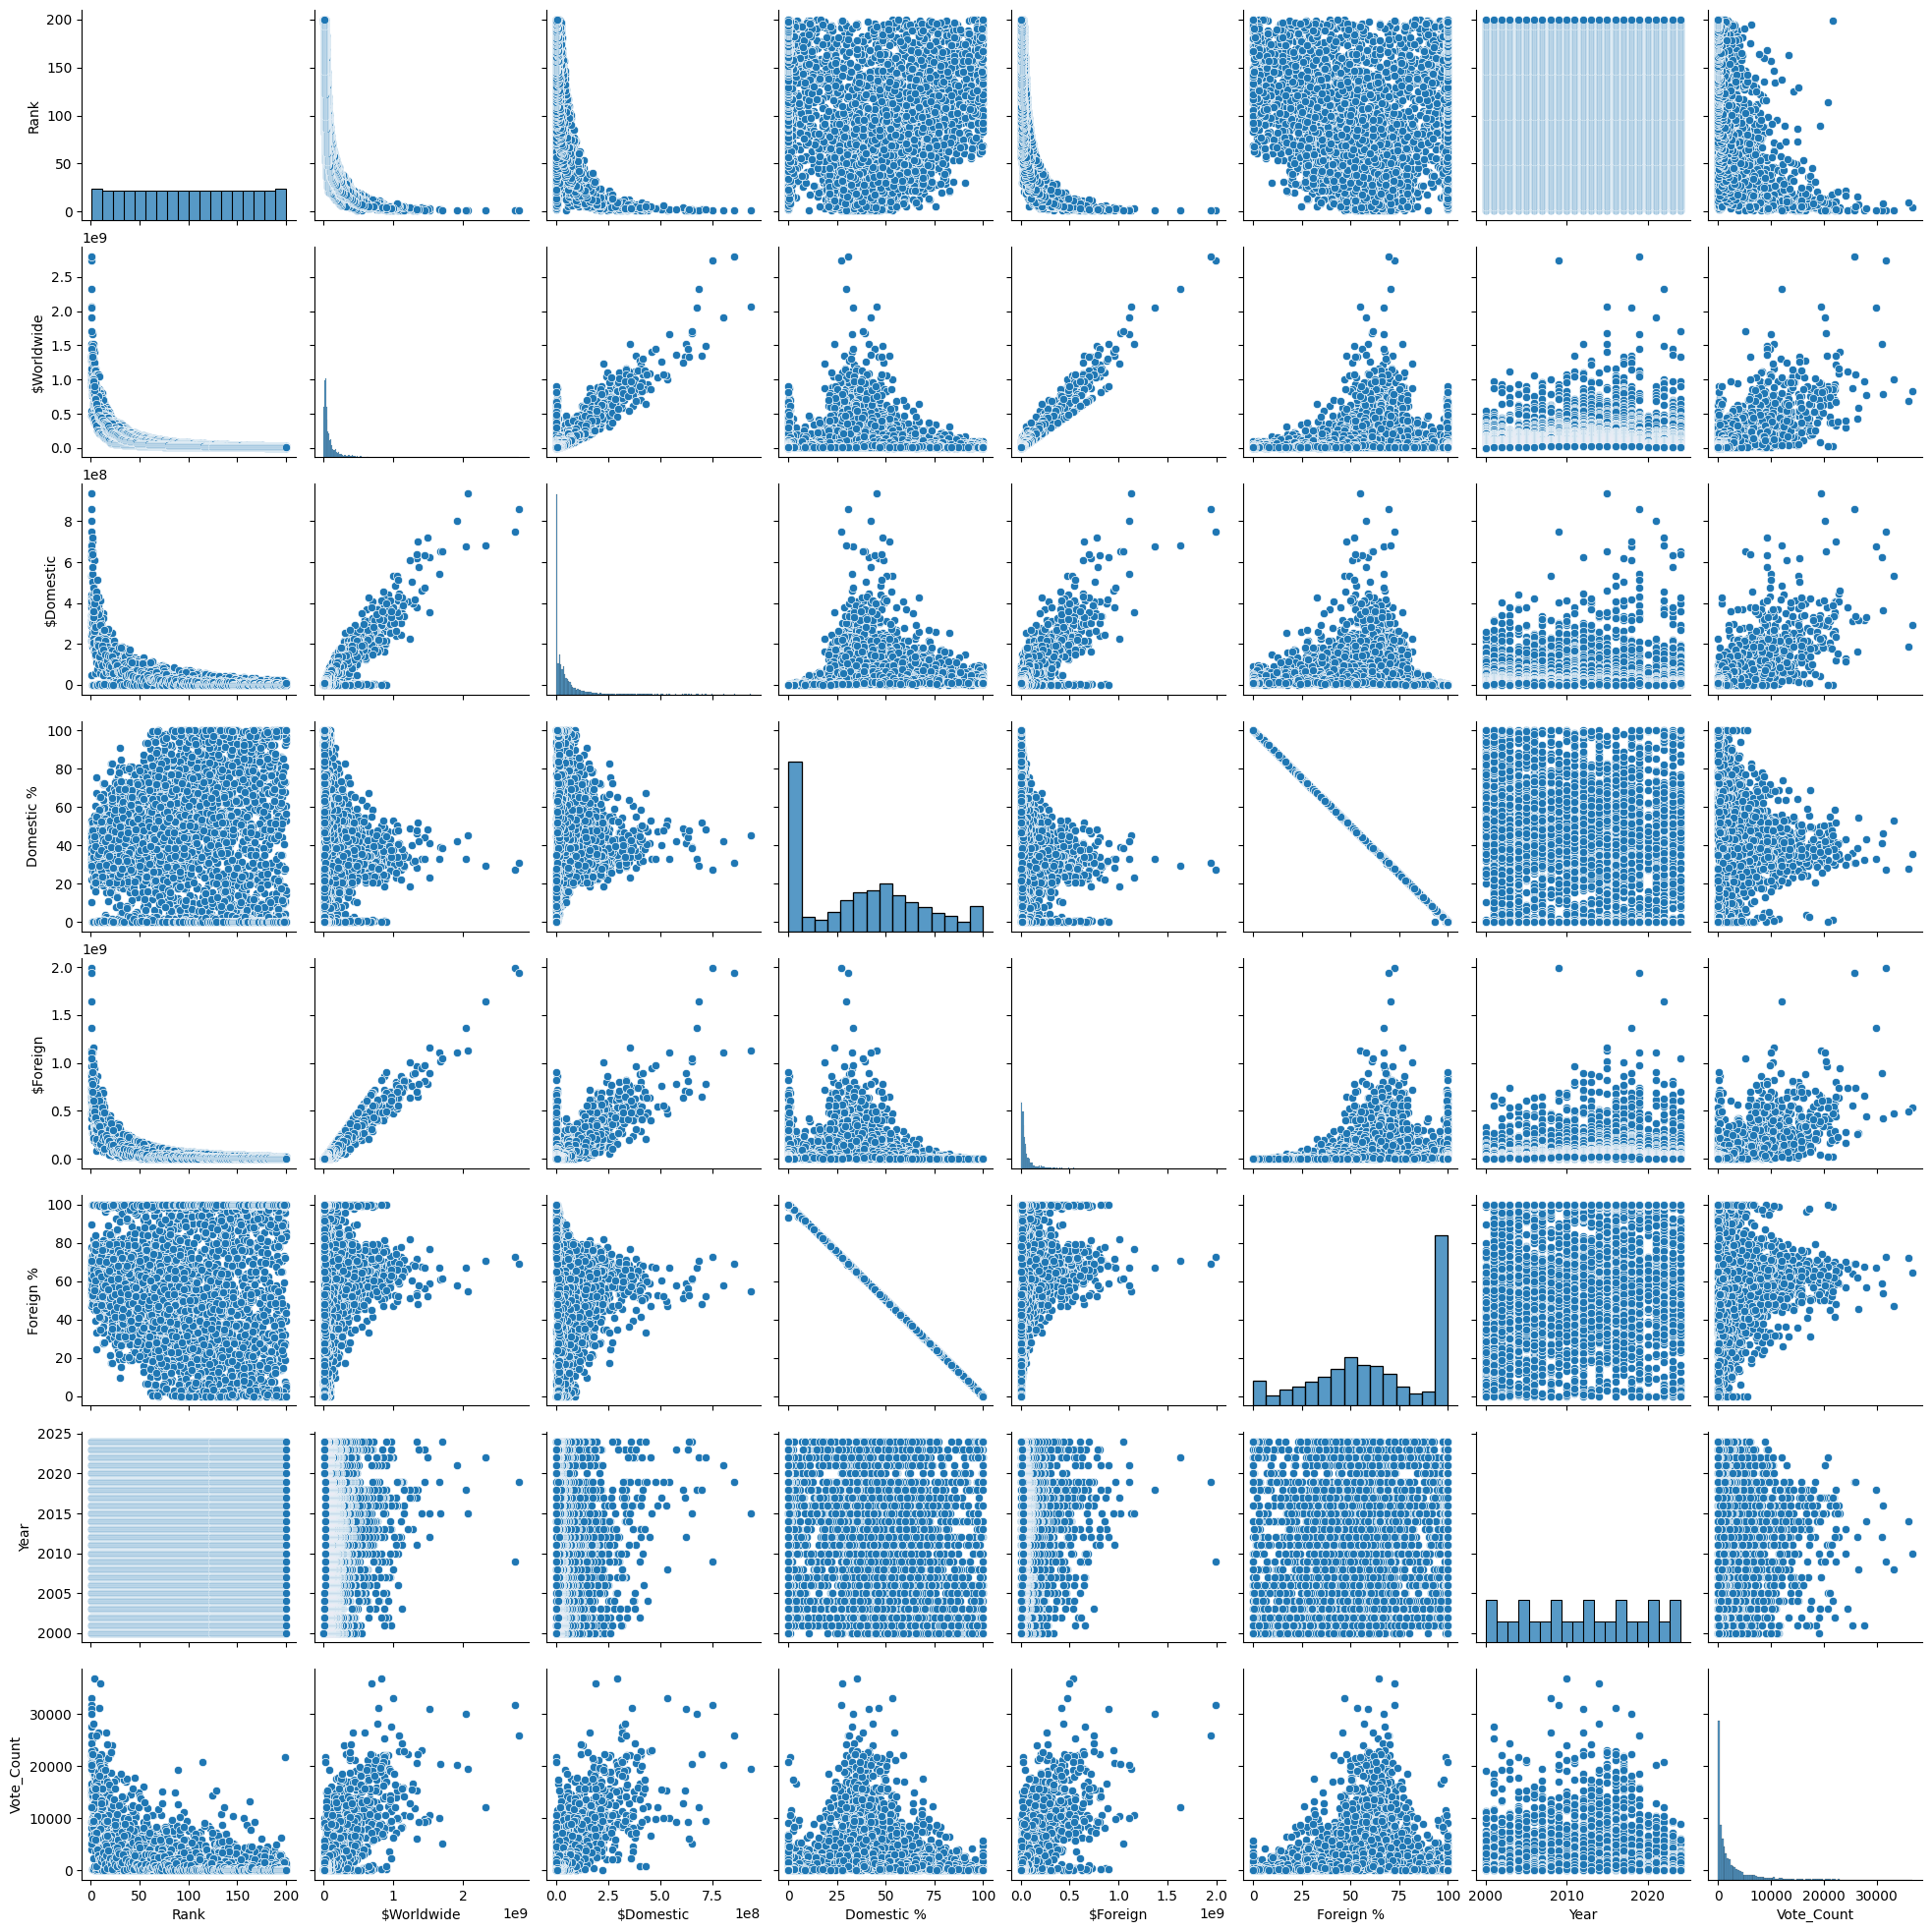

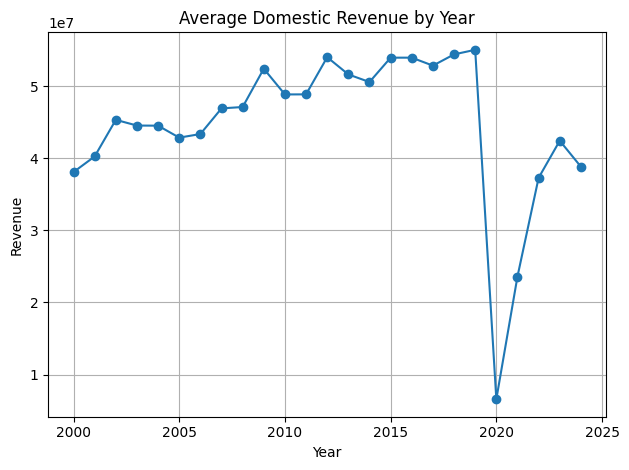

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("enhanced_box_office_data.csv")

# Correlation heatmap for numeric columns
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

# Plot average domestic revenue by year
df.groupby('Year')["$Domestic"].mean().plot(kind='line', marker='o')
plt.title("Average Domestic Revenue by Year")
plt.ylabel("Revenue")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


For this analysis, I used the enhanced_box_office_data.csv dataset. First, I computed correlations between the numerical columns, which showed strong positive relationships between domestic and worldwide gross revenues. This can suggest that higher-earning movies perform well both domestically and internationally, meaning there is some redundancy between these variables.

Using pairplots, I found some clustering in budget and revenue values, along with a few clear outliers like blockbuster films with unusually high earnings. These types of data points can distort statistical models and should be considered separately if later.

I also plotted the average domestic revenue by year using the year column. The line graph revealed some fluctuation over time, with certain years performing significantly better than others. This suggests that external factors, like the economy or release slates in a given year, can influence box office success. While the dataset appears usable, it could benefit from additional date granularity and outlier treatment. Potential confounders such as genre, production country, or rating are worth exploring in further analyses.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

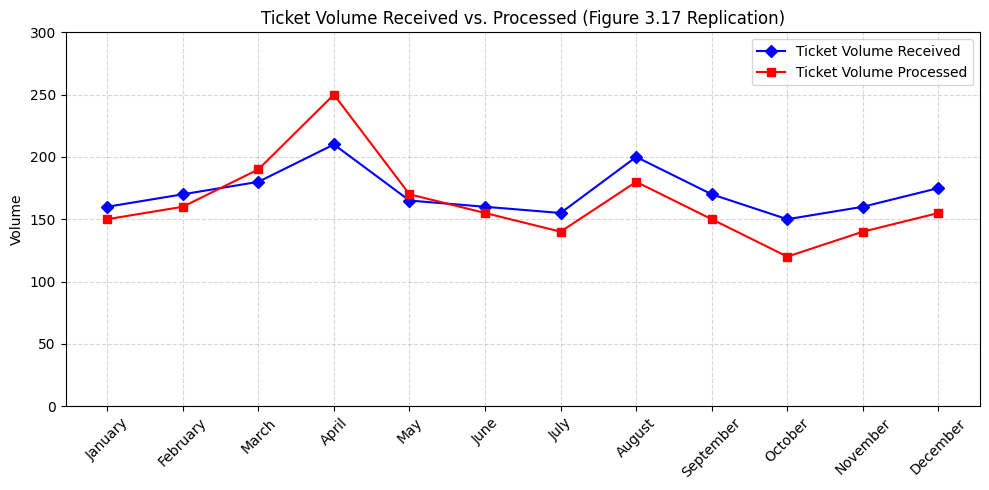

In [6]:
import matplotlib.pyplot as plt

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
received = [160, 170, 180, 210, 165, 160, 155, 200, 170, 150, 160, 175]
processed = [150, 160, 190, 250, 170, 155, 140, 180, 150, 120, 140, 155]

plt.figure(figsize=(10, 5))
plt.plot(months, received, marker='D', label="Ticket Volume Received", color='blue')
plt.plot(months, processed, marker='s', label="Ticket Volume Processed", color='red')

plt.title("Ticket Volume Received vs. Processed (Figure 3.17 Replication)")
plt.ylabel("Volume")
plt.ylim(0, 300)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


I chose Figure 3.17 from page 91 to recreate. This graph compares ticket volume received versus processed across each month of the year. The graph uses line plots with diamonds indicating received tickets and squares indicating processed tickets. This format effectively shows both trends together while making gaps/inefficiencies easy to identify. An example would be when received volume exceeds processed volume. I recreated the design with a readable y-axis, color contrast, and a grid to match the style in the book.